__Data Loading & Importing Required Libraries__

In [263]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [101]:
#READ DATA
df=pd.read_csv("day.csv")

__Data Understanding & Data Cleaning__

In [102]:
#HAVE LOOK AT DATA
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [103]:
#checking for datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [104]:
#Get data distributions for eaach columns 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [105]:
#droping instant as its index for the data set 
df.drop(['instant'],axis=1,inplace=True)

In [106]:
#We do not need dteday as its continous date value 
df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [107]:
#Casual and Registered values are not required as the sum of those columns is cnt
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [108]:
#checking the shape of the data 
df.shape

(730, 12)

In [109]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [110]:
#No duplicate exists 
df.shape

(730, 12)

__Data Mapping__

In [111]:
#Mapping season column with values for easy understating 
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [112]:
#Mapping month column with values for easy understating 

df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [113]:
#Mapping weekday column with values for easy understating 
df.weekday = df.weekday.map({0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'})

In [114]:
#Mapping weathersit column with values for easy understating
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [115]:
#Cross-check data has been mapped successfully for top few rows
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sun,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,mon,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,thu,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [116]:
#Getting Column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


__EDA(Visualising the Data)__

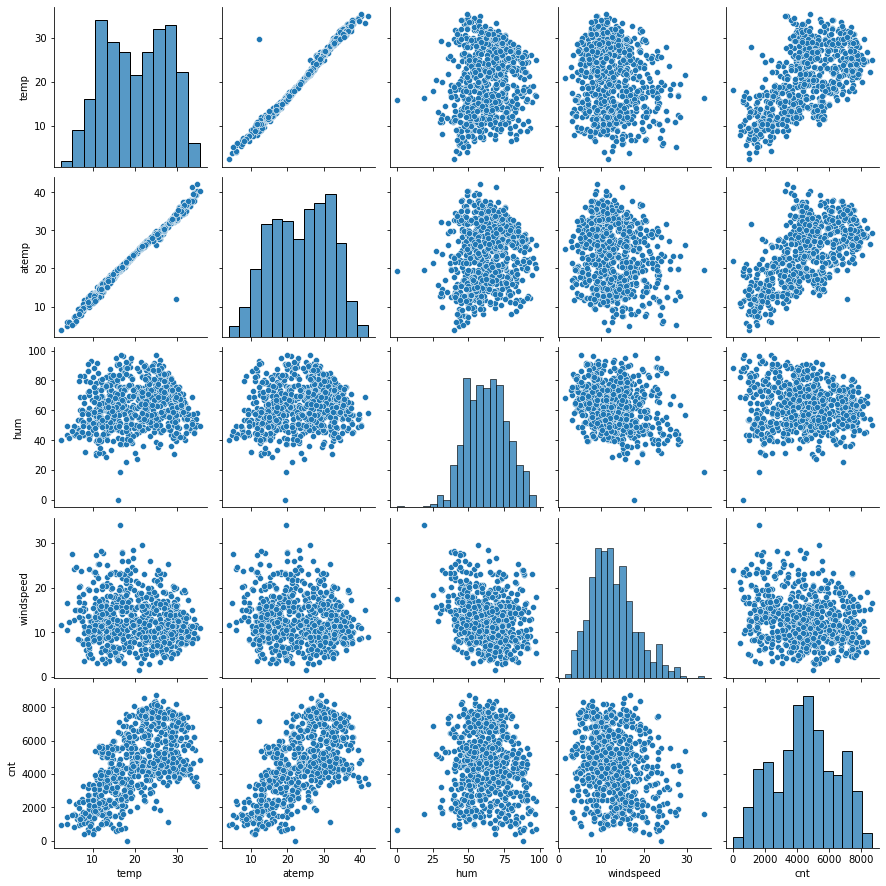

In [117]:
#Visualizing using Pairplot for Temp,atemp,hum,windspeed and Cnt
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

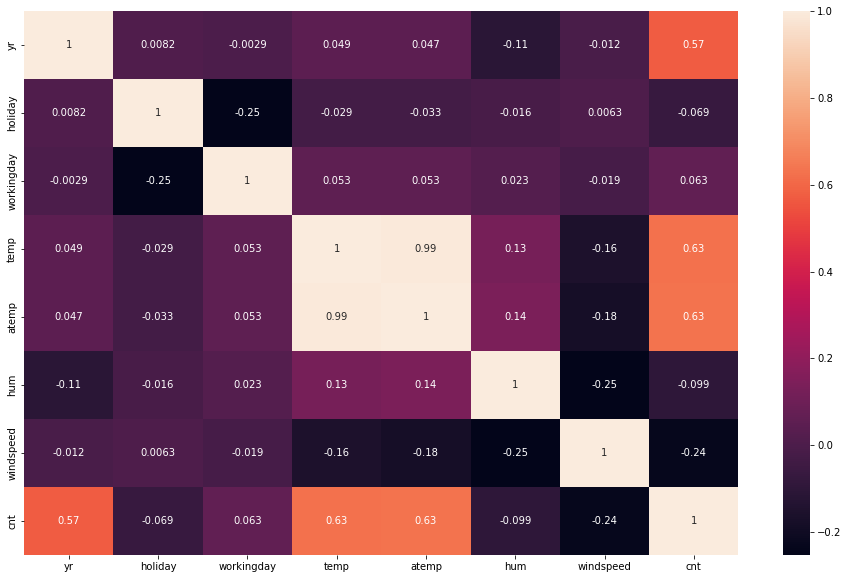

In [118]:
#Checking the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [119]:
#correlation between temp and atemp is 0.99 so we can keep one of them only 
df.drop(['temp'],axis=1,inplace=True)
df.shape

(730, 11)

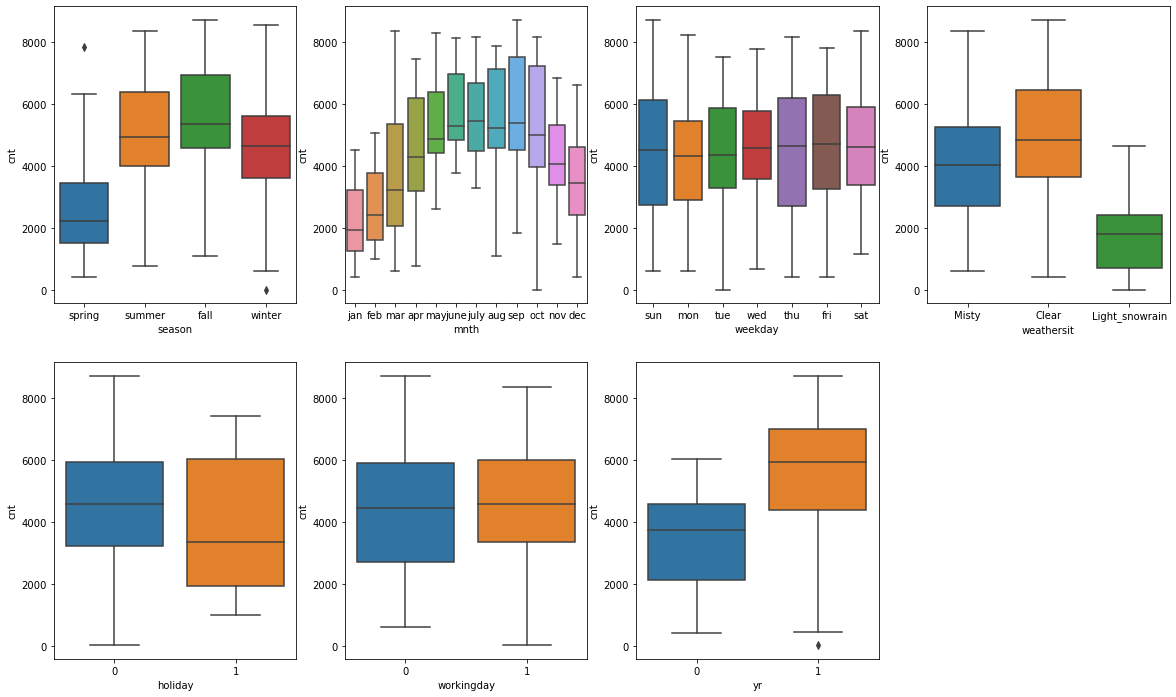

In [120]:
# Visualizing catagorical values

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

Summer and Fall do have high percentile cnt <br> Its reflecting also on Summer and Fall Months <br> Sunday has high percentile cnt <br> And offcourse when Weather is Clear it has high percentile cnt


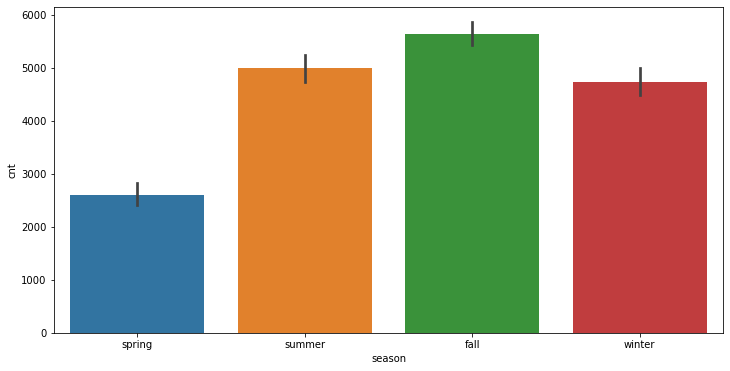

In [121]:
plt.figure(figsize = (12,6))
sns.barplot('season','cnt',data=df)
plt.show()

Fall Season has more booking

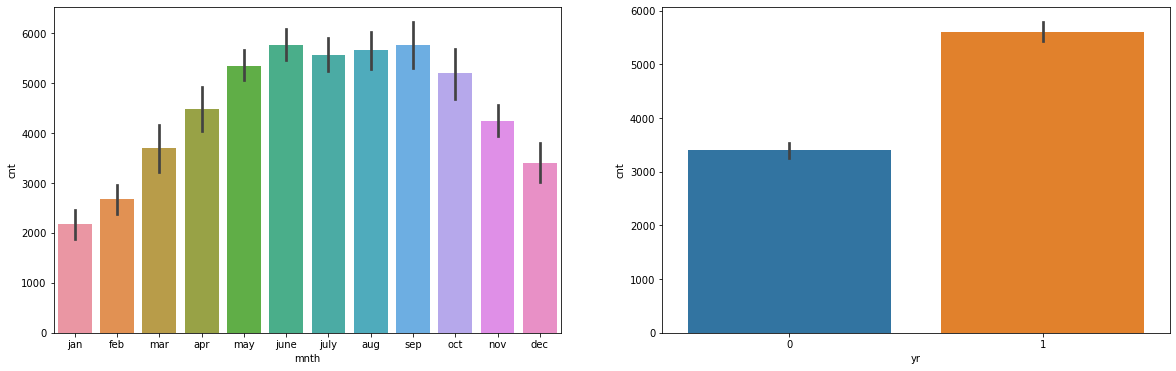

In [122]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.barplot('mnth','cnt',data=df)
plt.subplot(1,2,2)
sns.barplot('yr','cnt',data=df)
plt.show()

June - Sep has lots of booking <br> 2019 had most number of bookings 

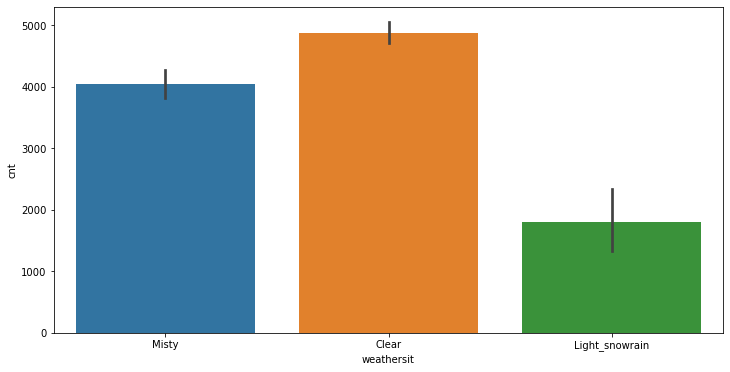

In [123]:
plt.figure(figsize = (12,6))
sns.barplot('weathersit','cnt',data=df)
plt.show()

Clear Weathersit has lots of booking

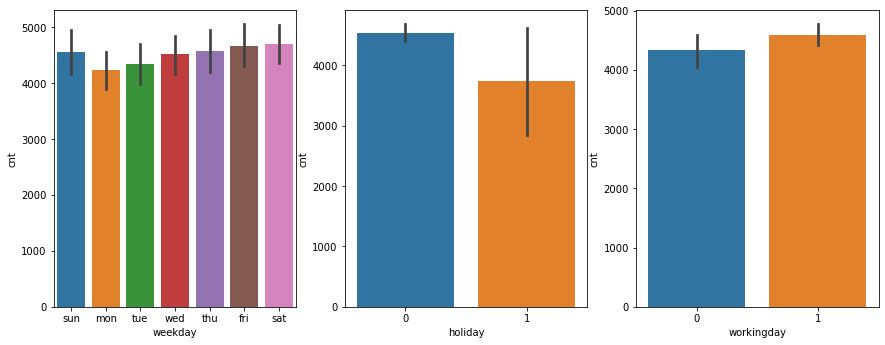

In [124]:
plt.figure(figsize = (20,12))
plt.subplot(2,4,1)
sns.barplot('weekday','cnt',data=df)
plt.subplot(2,4,2)
sns.barplot('holiday','cnt',data=df)
plt.subplot(2,4,3)
sns.barplot('workingday','cnt',data=df)
plt.show()

Monday and Tuesday are low <br> Holiday  booking is high 

__Data Preperation for Linear Regression__

In [125]:
# Creation of dummy variables for  for month, weekday, weathersit and season variables.

mnth_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [126]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sun,0,Misty,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,mon,0,Misty,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,tue,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,wed,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,thu,1,Clear,11.46350,43.6957,12.522300,1600


In [127]:
# joining the dummy variable dataset. 

df_new = pd.concat([df,mnth_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [128]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sun,0,Misty,18.18125,80.5833,10.749882,...,0,1,0,0,0,0,1,1,0,0
1,spring,0,jan,0,mon,0,Misty,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,1,0,0
2,spring,0,jan,0,tue,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,1,0,0,0,1,0,0
3,spring,0,jan,0,wed,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,1,0,0,1,0,0
4,spring,0,jan,0,thu,1,Clear,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,1,0,0


In [129]:
# dropping  columns which has dummy variable for it.
df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [130]:
# check the shape of new dataframe
df_new.shape

(730, 29)

In [131]:
# check the head of new dataframe
df_new.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [132]:
# check the data type after adding new columns
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   atemp           730 non-null    float64
 4   hum             730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   aug             730 non-null    uint8  
 8   dec             730 non-null    uint8  
 9   feb             730 non-null    uint8  
 10  jan             730 non-null    uint8  
 11  july            730 non-null    uint8  
 12  june            730 non-null    uint8  
 13  mar             730 non-null    uint8  
 14  may             730 non-null    uint8  
 15  nov             730 non-null    uint8  
 16  oct             730 non-null    uint8  
 17  sep             730 non-null    uin

__Defining Training and Testing Set from existing data__

In [133]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [134]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [135]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,1,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,0,...,0,0,0,0,0,0,1,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,1,0,0,...,0,0,1,0,0,0,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [136]:
#Scaling the data for below 4 columns on training data
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [137]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [138]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [139]:
y_train = df_train.pop('cnt')
X_train = df_train

In [140]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,aug,dec,feb,jan,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.501133,0.575354,0.300794,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,0,0.200348,0.498067,0.663106,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [141]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [142]:
#Finding RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [143]:
print(X_train.columns[rfe.support_])

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'aug', 'dec', 'feb',
       'jan', 'nov', 'sep', 'Light_snowrain', 'Misty', 'summer', 'winter'],
      dtype='object')


In [144]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'aug', 'dec', 'feb',
       'jan', 'nov', 'sep', 'Light_snowrain', 'Misty', 'summer', 'winter'],
      dtype='object')

In [145]:
#to make sure remaining columns are not inclued 
X_train.columns[~rfe.support_]

Index(['workingday', 'july', 'june', 'mar', 'may', 'oct', 'mon', 'sat', 'sun',
       'thu', 'tue', 'wed', 'spring'],
      dtype='object')

In [146]:
#Assininging only for RFE supported columns
X_train_rfe = X_train[col]

In [147]:
#To check no catagorical variable exists 
np.asarray(X_train_rfe1)

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [148]:
#Building Stats Model using Stats API
#starting by adding constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [149]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [150]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          1.26e-186
Time:                        05:44:22   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2936      0.032      9.

In [152]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
14,winter,3.04
13,summer,2.28
12,Misty,2.24
0,yr,2.06
8,jan,1.92
9,nov,1.85
6,dec,1.63


In [153]:
X_train_rfe1.head()

,const,yr,holiday,atemp,hum,windspeed,aug,dec,feb,jan,nov,sep,Light_snowrain,Misty,summer,winter
653,1.0,1,0,0.501133,0.575354,0.300794,0,0,0,0,0,0,0,0,0,1
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,0,0,0,0,0,0,0,1,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,0,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,1,1,0


In [ ]:
#droping Hum as it has high VFS 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [156]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [157]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [158]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          7.00e-184
Time:                        05:52:25   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2114      0.026      8.

In [159]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
13,winter,2.62
0,yr,2.06
12,summer,2.04
8,nov,1.81
4,aug,1.59
11,Misty,1.57
5,dec,1.41
9,sep,1.35


In [160]:
#dropping atemp as it has high VIF 
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [161]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [162]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [163]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     127.8
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          6.20e-149
Time:                        05:56:38   Log-Likelihood:                 413.36
No. Observations:                 510   AIC:                            -798.7
Df Residuals:                     496   BIC:                            -739.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5180      0.016     32.

In [164]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.06
12,winter,2.49
0,yr,1.85
7,nov,1.80
11,summer,1.80
10,Misty,1.55
4,dec,1.40
6,jan,1.27
5,feb,1.26
3,aug,1.24


In [165]:
#droping windspeed as its greater than 2
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [166]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [167]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [168]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     118.3
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          4.35e-137
Time:                        05:59:59   Log-Likelihood:                 382.62
No. Observations:                 510   AIC:                            -739.2
Df Residuals:                     497   BIC:                            -684.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4407      0.013     33.

In [169]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,winter,2.39
6,nov,1.77
0,yr,1.71
9,Misty,1.53
3,dec,1.37
10,summer,1.36
2,aug,1.16
5,jan,1.15
7,sep,1.14
4,feb,1.09


In [170]:
#dropping winter since its VIF is greater than 2 and also P value is high 
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [171]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [172]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [173]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     119.4
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          6.54e-132
Time:                        06:04:13   Log-Likelihood:                 367.80
No. Observations:                 510   AIC:                            -711.6
Df Residuals:                     498   BIC:                            -660.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4701      0.012     37.

In [174]:
#Summer has high p value and hence needs to be dropped 
X_train_rfe=X_train_rfe.drop(['summer'],axis=1)

In [175]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [176]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [177]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          6.15e-133
Time:                        06:13:14   Log-Likelihood:                 367.70
No. Observations:                 510   AIC:                            -713.4
Df Residuals:                     499   BIC:                            -666.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4734      0.010     46.

In [178]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.42
9,Misty,1.34
2,aug,1.11
5,jan,1.10
6,nov,1.10
7,sep,1.10
3,dec,1.07
1,holiday,1.06
4,feb,1.06
8,Light_snowrain,1.02


In [179]:
#Adding other columns which had RFE support as false one by one to see if it improves the model 
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,aug,dec,feb,jan,nov,sep,Light_snowrain,Misty,workingday
653,1,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0,0,0,0,0,0,1,0
728,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0


In [180]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [181]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [182]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          1.13e-132
Time:                        06:21:03   Log-Likelihood:                 369.61
No. Observations:                 510   AIC:                            -715.2
Df Residuals:                     498   BIC:                            -664.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4584      0.013     36.

In [183]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,2.06
0,yr,1.68
9,Misty,1.45
2,aug,1.15
6,nov,1.14
5,jan,1.13
7,sep,1.13
3,dec,1.10
4,feb,1.09
1,holiday,1.08


In [184]:
# Workingday as its having high p value and high VIF value and hence dropping it
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [185]:
#Adding july
X_train_rfe['july']=X_train['july']
X_train_rfe.head()

,yr,holiday,aug,dec,feb,jan,nov,sep,Light_snowrain,Misty,july
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0,0,0,0,0,0,1,0
728,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0


In [186]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [187]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [188]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          8.21e-134
Time:                        06:25:20   Log-Likelihood:                 372.31
No. Observations:                 510   AIC:                            -720.6
Df Residuals:                     498   BIC:                            -669.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4628      0.011     43.

In [189]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.49
9,Misty,1.35
2,aug,1.12
5,jan,1.11
6,nov,1.11
7,sep,1.11
3,dec,1.08
4,feb,1.07
1,holiday,1.06
10,july,1.06


Adding July it looks good p value and VIF looks decent

In [190]:
#Adding june
X_train_rfe['june']=X_train['june']
X_train_rfe.head()

,yr,holiday,aug,dec,feb,jan,nov,sep,Light_snowrain,Misty,july,june
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0,0,0,0,0,0,1,0,0
728,1,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0,0


In [191]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [192]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [193]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     119.9
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          3.63e-138
Time:                        06:27:49   Log-Likelihood:                 385.19
No. Observations:                 510   AIC:                            -744.4
Df Residuals:                     497   BIC:                            -689.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4416      0.011     39.

In [194]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.57
9,Misty,1.35
2,aug,1.12
5,jan,1.11
6,nov,1.11
7,sep,1.11
3,dec,1.08
4,feb,1.07
10,july,1.07
1,holiday,1.06


Adding June it looks good p value and VIF looks decent

In [195]:
#Adding MAR
X_train_rfe['mar']=X_train['mar']
X_train_rfe.head()

,yr,holiday,aug,dec,feb,jan,nov,sep,Light_snowrain,Misty,july,june,mar
653,1,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0,0,0,0,0,0,1,0,0,1
728,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0,0,0


In [196]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [197]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [198]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     130.6
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          9.44e-151
Time:                        06:30:59   Log-Likelihood:                 417.69
No. Observations:                 510   AIC:                            -807.4
Df Residuals:                     496   BIC:                            -748.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4851      0.012     41.

In [199]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.66
9,Misty,1.39
2,aug,1.14
5,jan,1.12
6,nov,1.12
7,sep,1.12
12,mar,1.11
3,dec,1.09
4,feb,1.08
10,july,1.07


Adding Mar it looks good p value and VIF looks decent

In [200]:
#Adding May
X_train_rfe['may']=X_train['may']
X_train_rfe.head()

,yr,holiday,aug,dec,feb,jan,nov,sep,Light_snowrain,Misty,july,june,mar,may
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0,0,0,0,0,0,1,0,0,1,0
728,1,0,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [201]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [202]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [203]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          3.46e-151
Time:                        06:33:10   Log-Likelihood:                 421.28
No. Observations:                 510   AIC:                            -812.6
Df Residuals:                     495   BIC:                            -749.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4664      0.014     34.

In [204]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.74
9,Misty,1.47
2,aug,1.15
5,jan,1.14
6,nov,1.13
7,sep,1.13
12,mar,1.13
13,may,1.13
3,dec,1.10
4,feb,1.08


Adding May it looks good p value and VIF looks decent

In [205]:
#Adding Oct
X_train_rfe['oct']=X_train['oct']
X_train_rfe.head()

,yr,holiday,aug,dec,feb,jan,nov,sep,Light_snowrain,Misty,july,june,mar,may,oct
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
728,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [206]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [207]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [208]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     119.4
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          2.30e-153
Time:                        06:37:00   Log-Likelihood:                 429.02
No. Observations:                 510   AIC:                            -826.0
Df Residuals:                     494   BIC:                            -758.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4192      0.018     23.

In [209]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
9,Misty,1.54
14,oct,1.18
2,aug,1.17
5,jan,1.16
7,sep,1.16
6,nov,1.15
12,mar,1.15
13,may,1.14
3,dec,1.11


Keeping Oct for future use

In [210]:
#Adding mon
X_train_rfe['mon']=X_train['mon']
X_train_rfe.head()

,yr,holiday,aug,dec,feb,jan,nov,sep,Light_snowrain,Misty,july,june,mar,may,oct,mon
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
728,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [211]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [212]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [213]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     116.3
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          9.75e-156
Time:                        06:42:53   Log-Likelihood:                 437.23
No. Observations:                 510   AIC:                            -840.5
Df Residuals:                     493   BIC:                            -768.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4283      0.018     23.

In [214]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
9,Misty,1.55
14,oct,1.21
2,aug,1.18
5,jan,1.17
6,nov,1.17
15,mon,1.17
7,sep,1.16
12,mar,1.15
13,may,1.15


Adding Mon also model looks good

In [215]:
#Adding sat
X_train_rfe['sat']=X_train['sat']
X_train_rfe.head()

,yr,holiday,aug,dec,feb,jan,nov,sep,Light_snowrain,Misty,july,june,mar,may,oct,mon,sat
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
728,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [216]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [217]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [218]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          7.99e-155
Time:                        06:45:36   Log-Likelihood:                 437.53
No. Observations:                 510   AIC:                            -839.1
Df Residuals:                     492   BIC:                            -762.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4268      0.018     23.

In [219]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
9,Misty,1.56
14,oct,1.22
2,aug,1.20
15,mon,1.20
6,nov,1.18
16,sat,1.18
5,jan,1.18
7,sep,1.17
13,may,1.17


In [221]:
#dropping Saturday as its causing high p value 
X_train_rfe=X_train_rfe.drop(['sat'],axis=1)

In [222]:
#Adding MAR
X_train_rfe['sun']=X_train['sun']
X_train_rfe.head()

,yr,holiday,aug,dec,feb,jan,nov,sep,Light_snowrain,Misty,july,june,mar,may,oct,mon,sun
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
728,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [223]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [224]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [225]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     109.3
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          1.06e-154
Time:                        06:48:58   Log-Likelihood:                 437.24
No. Observations:                 510   AIC:                            -838.5
Df Residuals:                     492   BIC:                            -762.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4279      0.018     23.

In [226]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
9,Misty,1.55
14,oct,1.23
16,sun,1.21
5,jan,1.20
2,aug,1.20
15,mon,1.20
6,nov,1.19
7,sep,1.18
12,mar,1.18


In [227]:
#dropping Saturday as its causing high p value 
X_train_rfe=X_train_rfe.drop(['sun'],axis=1)

In [228]:
#Adding MAR
X_train_rfe['thu']=X_train['thu']
X_train_rfe.head()

,yr,holiday,aug,dec,feb,jan,nov,sep,Light_snowrain,Misty,july,june,mar,may,oct,mon,thu
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
728,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [229]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [230]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [231]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          9.44e-155
Time:                        06:51:13   Log-Likelihood:                 437.36
No. Observations:                 510   AIC:                            -838.7
Df Residuals:                     492   BIC:                            -762.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4272      0.018     23.

In [232]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
9,Misty,1.55
16,thu,1.23
14,oct,1.22
2,aug,1.20
15,mon,1.20
5,jan,1.19
6,nov,1.19
7,sep,1.19
13,may,1.18


In [233]:
#dropping Saturday as its causing high p value 
X_train_rfe=X_train_rfe.drop(['thu'],axis=1)

In [238]:
#Adding tue
X_train_rfe['tue']=X_train['tue']
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [239]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          5.83e-155
Time:                        06:54:54   Log-Likelihood:                 437.86
No. Observations:                 510   AIC:                            -839.7
Df Residuals:                     492   BIC:                            -763.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4307      0.018     23.

In [240]:
#dropping Tue and Nov as it has  high p value 
X_train_rfe=X_train_rfe.drop(['tue'],axis=1)
X_train_rfe=X_train_rfe.drop(['nov'],axis=1)

In [241]:
#Adding wed
X_train_rfe['wed']=X_train['wed']
X_train_rfe.head()

,yr,holiday,aug,dec,feb,jan,sep,Light_snowrain,Misty,july,june,mar,may,oct,mon,wed
653,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
576,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
426,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
728,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [242]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     116.4
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          9.39e-156
Time:                        06:57:05   Log-Likelihood:                 437.27
No. Observations:                 510   AIC:                            -840.5
Df Residuals:                     493   BIC:                            -768.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4245      0.014     31.

In [243]:
#dropping wed as its causing high p value 
X_train_rfe=X_train_rfe.drop(['wed'],axis=1)

In [244]:
#Adding spring
X_train_rfe['spring']=X_train['spring']
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     126.6
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          6.53e-163
Time:                        06:58:14   Log-Likelihood:                 454.44
No. Observations:                 510   AIC:                            -874.9
Df Residuals:                     493   BIC:                            -802.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4242      0.013     32.

In [245]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,spring,6.07
5,jan,3.39
4,feb,2.78
11,mar,2.17
0,yr,1.75
8,Misty,1.49
3,dec,1.31
13,oct,1.18
2,aug,1.16
14,mon,1.15


In [246]:
#spring has high VIF value and it needs to be dropped 
X_train_rfe=X_train_rfe.drop(['spring'],axis=1)

In [247]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          9.40e-157
Time:                        06:59:34   Log-Likelihood:                 437.13
No. Observations:                 510   AIC:                            -842.3
Df Residuals:                     494   BIC:                            -774.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4232      0.013     31.

In [248]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.75
8,Misty,1.49
13,oct,1.18
2,aug,1.16
5,jan,1.15
14,mon,1.15
6,sep,1.14
12,may,1.14
11,mar,1.13
3,dec,1.11


Now after processing all columns we have arrived with above set of coloums and model 

In [249]:
#Predict values
y_train_cnt = lm2.predict(X_train_rfe2)

In [251]:
#Find Residuals
res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

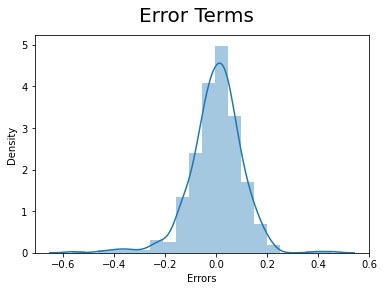

In [270]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors')

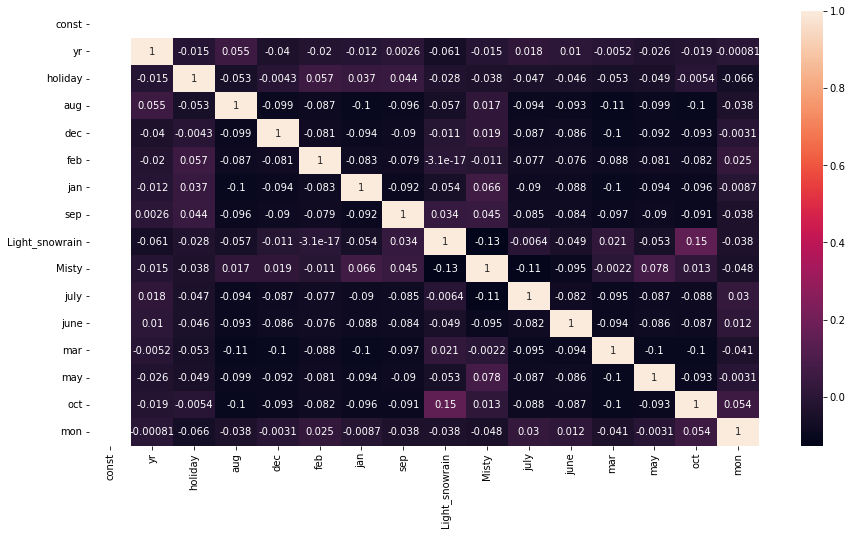

In [254]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe2.corr(),annot = True)
plt.show()

__Evaluvating the Model__

In [255]:
#applying scaling to the test data 
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [256]:
y_test = df_test.pop('cnt')
X_test = df_test

In [257]:
#Dropping the constant value since we need the columns for reffering test data
X_train_new=X_train_rfe2.drop(['const'], axis=1)

In [258]:
#creating a new test refference with valid xtrain model 
X_test_new = X_test[X_train_new.columns]

In [259]:
X_test_new.columns

Index(['yr', 'holiday', 'aug', 'dec', 'feb', 'jan', 'sep', 'Light_snowrain',
       'Misty', 'july', 'june', 'mar', 'may', 'oct', 'mon'],
      dtype='object')

In [260]:
#Adding constant
X_test_new = sm.add_constant(X_test_new)

In [261]:
y_pred = lm2.predict(X_test_new)

Text(0, 0.5, 'y_pred')

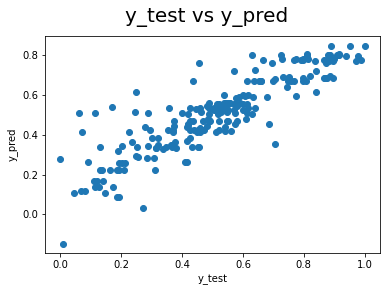

In [269]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test')
plt.ylabel('y_pred')

The model is good .

In [264]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.11493814886767813

In [265]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7670810342501213

In [266]:
X_t=X_train_new.iloc[:,0].values

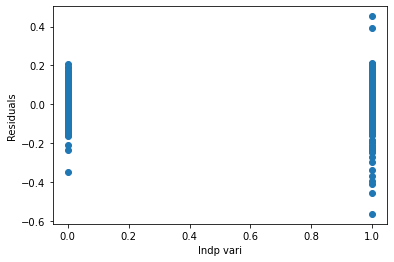

In [267]:
plt.figure()
plt.scatter(X_t,res)
plt.xlabel('Indp vari')
plt.ylabel('Residuals')
plt.show()

In [268]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          9.40e-157
Time:                        08:42:42   Log-Likelihood:                 437.13
No. Observations:                 510   AIC:                            -842.3
Df Residuals:                     494   BIC:                            -774.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4232      0.013     31.

Demand of bike increases in the month of May, June , July Aug , Sep  and Oct.<br> 
Demand of bike increases in regards to Year as well .